In [2]:
%load_ext RWinOut

C:\Users\Mohit\Anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [3]:
%%R
library(bnlearn)

In [4]:
%%R

# Assumptions

# A = Age
# N = Nationality
# P = Position (Preferred/Most frequent)
# OC = Origin Club
# OL = Origin League
# OLC = Origin League Country
# AC = Arrival Club
# AL = Arrival League
# ALC = Arrival League Country
# Ovr = Overall Rating
# Pot = Potential Rating
# Y = Year
# T = Transfer Price

dag <- model2network("[A][N][P][Ovr|P][Pot|P][OC|OL][AC|AL][OL][AL][Y][T|A:N:P:Ovr:Pot:OC:AC:Y]")
dag


  Random/Generated Bayesian network

  model:
   [A][AL][N][OL][P][Y][AC|AL][OC|OL][Ovr|P][Pot|P][T|A:AC:N:OC:Ovr:P:Pot:Y] 
  nodes:                                 11 
  arcs:                                  12 
    undirected arcs:                     0 
    directed arcs:                       12 
  average markov blanket size:           6.91 
  average neighbourhood size:            2.18 
  average branching factor:              1.09 

  generation algorithm:                  Empty 



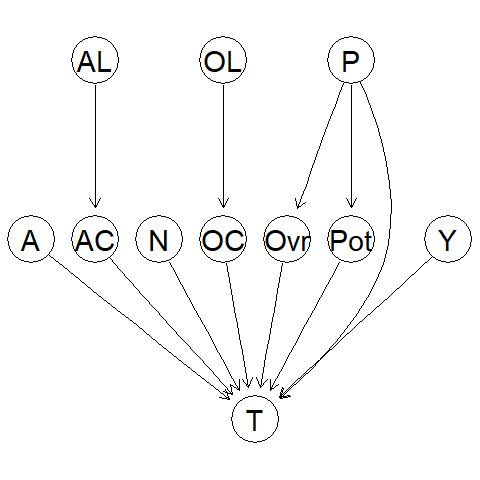

In [5]:
%%R
graphviz.plot(dag)

In [6]:
%%R

transfers_111 <- read.table("Causal-analysis-on-football-transfer-prices-data-preprocessing/data/transfers2.1 - Copy.csv", sep=',', header = TRUE)
head(transfers_111)

              AL          Y        OL   P     AC     OC       A       T     Pot
1 Premier League Before2016 BunSerLig DEF Tier_2 Tier_1 Under30 20Mto5M 85above
2      BunSerLig Before2016 BunSerLig DEF Tier_3 Tier_2 Above30 Below5M  75to84
3      BunSerLig Before2016 BunSerLig  GK Tier_2 Tier_4 Under23 Below5M  75to84
4      BunSerLig Before2016     Other  GK Tier_2 Tier_4 Under30 Below5M  75to84
5      BunSerLig  After2016 BunSerLig  GK Tier_2 Tier_2 Under30 Below5M  75to84
6      BunSerLig Before2016     Other MID Tier_1 Tier_4 Under23 Below5M  75to84
      Ovr  N
1  75to84 EU
2  75to84 EU
3 below65 EU
4  65to74 EU
5  65to74 EU
6  65to74 EU


In [ ]:
A_label = ['Under23', 'Under30', 'Above30']

N_label = ['AF','AS','EU','N_A','OC','SA' ]

P1_label = ['ATT', 'DEF','GK','MID']

OC_label = ['Tier1', 'Tier2', 'Tier3', 'Tier4']

OL_label = ['BunSerLig', 'Other','Premier League','Primera Division']

AC_label = ['Tier1', 'Tier2', 'Tier3', 'Tier4']

AL_label = ['BunSerLig', 'Other','Premier League','Primera Division']

Ovr_label = ['below65','65to74','75to84','85above']

Pot_label = ['below65','65to74','75to84','85above']

Y1_label = ['After2016', 'Before2016']

T1_label = ['20Mto5M','60Mto20M','Above60M','Below5M']

In [7]:
%%R

bn.bayes10 <- bn.fit(dag, data = transfers_111, method = "bayes", iss = 10)
bn.bayes10


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
    Above30    Under23    Under30 
0.04307709 0.48281135 0.47411157 

  Parameters of node AC (multinomial distribution)

Conditional probability table:
 
        AL
AC        BunSerLig      Other Premier League Primera Division
  Tier_1 0.31224162 0.17319610     0.51466864       0.45875421
  Tier_2 0.40962333 0.37328464     0.36608274       0.16649832
  Tier_3 0.20475425 0.21038070     0.10690165       0.29848485
  Tier_4 0.07338080 0.24313856     0.01234698       0.07626263

  Parameters of node AL (multinomial distribution)

Conditional probability table:
        BunSerLig            Other   Premier League Primera Division 
       0.5165296        0.1786618        0.1873616        0.1174470 

  Parameters of node N (multinomial distribution)

Conditional probability table:
          AF          AS          EU         N_A          OC          SA 
0.101655594 0.027312032 0

  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = N_A, OC = Tier_1, Ovr = 85above, P = ATT, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = N_A, OC = Tier_1, Ovr = 85above, P = ATT, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = N_A, OC = Tier_1, Ovr = 85above, P = ATT, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-0

  20Mto5M  2.500000e-01 3.390382e-05 2.260357e-05
  60Mto20M 2.500000e-01 3.390382e-05 2.260357e-05
  Above60M 2.500000e-01 3.390382e-05 2.260357e-05
  Below5M  2.500000e-01 9.998983e-01 9.999322e-01

, , AC = Tier_1, N = N_A, OC = Tier_4, Ovr = below65, P = ATT, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = N_A, OC = Tier_4, Ovr = below65, P = ATT, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = N_A, OC = Tier_4, Ovr = below65, P = ATT, Pot = 65to74, Y = After201

, , AC = Tier_3, N = EU, OC = Tier_3, Ovr = 75to84, P = DEF, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = EU, OC = Tier_3, Ovr = 75to84, P = DEF, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = N_A, OC = Tier_3, Ovr = 75to84, P = DEF, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.50

  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = EU, OC = Tier_2, Ovr = below65, P = DEF, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 6.779845e-05 2.500000e-01
  60Mto20M 2.500000e-01 6.779845e-05 2.500000e-01
  Above60M 2.500000e-01 6.779845e-05 2.500000e-01
  Below5M  2.500000e-01 9.997966e-01 2.500000e-01

, , AC = Tier_3, N = EU, OC = Tier_2, Ovr = below65, P = DEF, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 6.779845e-05 2.500000e-01
  60Mto20M 2.500000e-01 6.779845e-05 2.500000e-01
  Above60M 2.500000e-01 6.779845e-05 2.500000e-01
  Below5M  2.500000e-01 9.997966e-01 2.500000e-01

, , AC = Tier_4, N = EU, OC = Tier_2, Ovr = below65, P = DEF, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = EU, OC = Tier_1, Ovr = 75to84, P = GK, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = EU, OC = Tier_1, Ovr = 75to84, P = GK, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = EU, OC = Tie


, , AC = Tier_3, N = AS, OC = Tier_4, Ovr = 85above, P = GK, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = AS, OC = Tier_4, Ovr = 85above, P = GK, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = EU, OC = Tier_4, Ovr = 85above, P = GK, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.50

  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = AS, OC = Tier_3, Ovr = 65to74, P = MID, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = AS, OC = Tier_3, Ovr = 65to74, P = MID, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = AS, OC = Tier_3, Ovr = 65to74, P = MID, Pot = 65to74, Y = After2016

   


          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = AS, OC = Tier_2, Ovr = 85above, P = MID, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = AS, OC = Tier_2, Ovr = 85above, P = MID, Pot = 65to74, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = AS, OC 

  Above60M 2.500000e-01 2.500000e-01 2.260357e-05
  Below5M  2.500000e-01 2.500000e-01 2.260357e-05

, , AC = Tier_3, N = AF, OC = Tier_1, Ovr = 65to74, P = ATT, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 6.779845e-05 6.779845e-05
  60Mto20M 2.500000e-01 6.779845e-05 6.779845e-05
  Above60M 2.500000e-01 6.779845e-05 6.779845e-05
  Below5M  2.500000e-01 9.997966e-01 9.997966e-01

, , AC = Tier_4, N = AF, OC = Tier_1, Ovr = 65to74, P = ATT, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 6.779845e-05 2.500000e-01
  60Mto20M 2.500000e-01 6.779845e-05 2.500000e-01
  Above60M 2.500000e-01 6.779845e-05 2.500000e-01
  Below5M  2.500000e-01 9.997966e-01 2.500000e-01

, , AC = Tier_1, N = AS, OC = Tier_1, Ovr = 65to74, P = ATT, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 9.997966e-01 2.50

T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = AF, OC = Tier_4, Ovr = 75to84, P = ATT, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 6.779845e-05
  60Mto20M 2.500000e-01 2.500000e-01 6.779845e-05
  Above60M 2.500000e-01 2.500000e-01 6.779845e-05
  Below5M  2.500000e-01 2.500000e-01 9.997966e-01

, , AC = Tier_3, N = AF, OC = Tier_4, Ovr = 75to84, P = ATT, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 6.779845e-05
  60Mto20M 2.500000e-01 2.500000e-01 6.779845e-05
  Above60M 2.500000e-01 2.500000e-01 6.779845e-05
  Below5M  2.500000e-01 2.500000e-01 9.997966e-01

, , AC = Tier_4, N = AF, OC = Tier_4, Ovr =


, , AC = Tier_4, N = SA, OC = Tier_2, Ovr = below65, P = ATT, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = AF, OC = Tier_3, Ovr = below65, P = ATT, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = AF, OC = Tier_3, Ovr = below65, P = ATT, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 9.997966e-01 2.500000e-01
  60Mto20M 2.500000e-01 6.779845e-05 2.500000e-01
  Above60M 2.500000e-01 6.779845e-05 2

  60Mto20M 3.390382e-05 2.500000e-01 6.779845e-05
  Above60M 3.390382e-05 2.500000e-01 6.779845e-05
  Below5M  9.998983e-01 2.500000e-01 9.997966e-01

, , AC = Tier_3, N = SA, OC = Tier_1, Ovr = 75to84, P = DEF, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = SA, OC = Tier_1, Ovr = 75to84, P = DEF, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = AF, OC = Tier_2, Ovr = 75to84, P = DEF, Pot = 75to84, Y = After2016

          A
T               Above30      Under23     

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = AF, OC = Tier_1, Ovr = below65, P = DEF, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = AS, OC = Tier_1, Ovr = below65, P = DEF, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = AS, OC =

  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = AS, OC = Tier_4, Ovr = 65to74, P = GK, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = AS, OC = Tier_4, Ovr = 65to74, P = GK, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = EU, OC = Tier_4, Ovr = 65to74, P = GK, Pot = 75to84, Y = After2016

      

  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = OC, OC = Tier_4, Ovr = 85above, P = GK, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = OC, OC = Tier_4, Ovr = 85above, P = GK, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = OC, OC = Tier_4, Ovr = 85above, P = GK, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.50

, , AC = Tier_1, N = OC, OC = Tier_1, Ovr = 65to74, P = MID, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = OC, OC = Tier_1, Ovr = 65to74, P = MID, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = OC, OC = Tier_1, Ovr = 65to74, P = MID, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500

  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = N_A, OC = Tier_4, Ovr = 75to84, P = MID, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = OC, OC = Tier_4, Ovr = 75to84, P = MID, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = OC, OC = Tier_4, Ovr = 75to84, P = MID, Pot = 75to84, Y = After2016

          A
T               Above30      Under23    

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = N_A, OC = Tier_3, Ovr = below65, P = MID, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = N_A, OC = Tier_3, Ovr = below65, P = MID, Pot = 75to84, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = OC, OC

  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = N_A, OC = Tier_2, Ovr = 75to84, P = ATT, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 6.779845e-05
  60Mto20M 2.500000e-01 2.500000e-01 9.997966e-01
  Above60M 2.500000e-01 2.500000e-01 6.779845e-05
  Below5M  2.500000e-01 2.500000e-01 6.779845e-05

, , AC = Tier_2, N = N_A, OC = Tier_2, Ovr = 75to84, P = ATT, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = N_A, OC = Tier_2, Ovr = 75to84, P = ATT, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-0

  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = EU, OC = Tier_1, Ovr = below65, P = ATT, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = N_A, OC = Tier_1, Ovr = below65, P = ATT, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = N_A, OC = Tier_1, Ovr = below65, P = ATT, Pot = 85above, Y = After2

, , AC = Tier_2, N = EU, OC = Tier_4, Ovr = 65to74, P = DEF, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = EU, OC = Tier_4, Ovr = 65to74, P = DEF, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = EU, OC = Tier_4, Ovr = 65to74, P = DEF, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.

  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = EU, OC = Tier_3, Ovr = 85above, P = DEF, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = EU, OC = Tier_3, Ovr = 85above, P = DEF, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = EU, OC = Tier_3, Ovr = 85above, P = DEF, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-0

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = AS, OC = Tier_2, Ovr = 65to74, P = GK, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = EU, OC = Tier_2, Ovr = 65to74, P = GK, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 4.999661e-01 2.500000e-01
  60Mto20M 2.500000e-01 4.999661e-01 2.500000e-01
  Above60M 2.500000e-01 3.390382e-05 2.500000e-01
  Below5M  2.500000e-01 3.390382e-05 2.500000e-01

, , AC = Tier_2, N = EU, OC = T

  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = N_A, OC = Tier_3, Ovr = 85above, P = GK, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = N_A, OC = Tier_3, Ovr = 85above, P = GK, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = N_A, OC = Tier_3, Ovr = 85above, P = GK, Pot = 85above, Y = After201

, , AC = Tier_4, N = EU, OC = Tier_2, Ovr = 65to74, P = MID, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = N_A, OC = Tier_2, Ovr = 65to74, P = MID, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = N_A, OC = Tier_2, Ovr = 65to74, P = MID, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = OC, OC = Tier_3, Ovr = 85above, P = MID, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = OC, OC = Tier_3, Ovr = 85above, P = MID, Pot = 85above, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = SA, OC

  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = OC, OC = Tier_2, Ovr = 65to74, P = ATT, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = OC, OC = Tier_2, Ovr = 65to74, P = ATT, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = OC, OC = Tier_2, Ovr = 65to74, P = ATT, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2

  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = N_A, OC = Tier_1, Ovr = 85above, P = ATT, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = OC, OC = Tier_1, Ovr = 85above, P = ATT, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = OC, OC = Tier_1, Ovr = 85above, P = ATT, Pot = below65, Y = After20

, , AC = Tier_2, N = N_A, OC = Tier_4, Ovr = below65, P = ATT, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = N_A, OC = Tier_4, Ovr = below65, P = ATT, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = N_A, OC = Tier_4, Ovr = below65, P = ATT, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e

  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = N_A, OC = Tier_3, Ovr = 75to84, P = DEF, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = N_A, OC = Tier_3, Ovr = 75to84, P = DEF, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = N_A, OC = Tier_3, Ovr = 75to84, P = DEF, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-0

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = EU, OC = Tier_2, Ovr = below65, P = DEF, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = N_A, OC = Tier_2, Ovr = below65, P = DEF, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = N_A, 

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = EU, OC = Tier_3, Ovr = 75to84, P = GK, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = EU, OC = Tier_3, Ovr = 75to84, P = GK, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = EU, OC = T

, , AC = Tier_4, N = N_A, OC = Tier_2, Ovr = below65, P = GK, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = OC, OC = Tier_2, Ovr = below65, P = GK, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = OC, OC = Tier_2, Ovr = below65, P = GK, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = SA, OC = Tier_3, Ovr = 75to84, P = MID, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = SA, OC = Tier_3, Ovr = 75to84, P = MID, Pot = below65, Y = After2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = AF, OC =

T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = AS, OC = Tier_1, Ovr = 65to74, P = ATT, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = AS, OC = Tier_1, Ovr = 65to74, P = ATT, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = AS, OC = Tier_1, Ovr

  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = EU, OC = Tier_2, Ovr = 85above, P = ATT, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = EU, OC = Tier_2, Ovr = 85above, P = ATT, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = N_A, OC = Tier_2, Ovr = 85above, P = ATT, Pot = 65to74, Y = Before2016

          A
T               Above30      Under


          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 3.390382e-05 2.500000e-01
  60Mto20M 2.500000e-01 3.390382e-05 2.500000e-01
  Above60M 2.500000e-01 3.390382e-05 2.500000e-01
  Below5M  2.500000e-01 9.998983e-01 2.500000e-01

, , AC = Tier_2, N = EU, OC = Tier_1, Ovr = 65to74, P = DEF, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  6.779845e-05 3.390382e-05 3.390382e-05
  60Mto20M 6.779845e-05 3.390382e-05 3.390382e-05
  Above60M 6.779845e-05 3.390382e-05 3.390382e-05
  Below5M  9.997966e-01 9.998983e-01 9.998983e-01

, , AC = Tier_3, N = EU, OC = Tier_1, Ovr = 65to74, P = DEF, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 3.390382e-05 2.500000e-01
  60Mto20M 2.500000e-01 3.390382e-05 2.500000e-01
  Above60M 2.500000e-01 3.390382e-05 2.500000e-01
  Below5M  2.500000e-01 9.998983e-01 2.500000e-01

, , AC = Tier_4, N = EU, OC 

T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = N_A, OC = Tier_2, Ovr = 85above, P = DEF, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = OC, OC = Tier_2, Ovr = 85above, P = DEF, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = OC, OC = Tier_2, 

  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = SA, OC = Tier_3, Ovr = 65to74, P = GK, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = SA, OC = Tier_3, Ovr = 65to74, P = GK, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = SA, OC = Tier_3, Ovr = 65to74, P = GK, Pot = 65to74, Y = Before2016

   

  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = AF, OC = Tier_1, Ovr = below65, P = GK, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = AS, OC = Tier_1, Ovr = below65, P = GK, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = AS, OC = Tier_1, Ovr = below65, P = GK, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 6.779845e-05 6.779845e-05
  60Mto20M 2.500000e-01 6.779845e-05 6.779845e-05
  Above60M 2.500000e-01 6.779845e-05 6.779845e-05
  Below5M  2.500000e-01 9.997966e-01 9.997966e-01

, , AC = Tier_3, N = AF, OC = Tier_4, Ovr = 65to74, P = MID, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = AF, OC = Tier_4, Ovr = 65to74, P = MID, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 6.779845e-05 2.500000e-01
  60Mto20M 2.500000e-01 6.779845e-05 2.500000e-01
  Above60M 2.500000e-01 6.779845e-05 2.500000e-01
  Below5M  2.500000e-01 9.997966e-01 2.500000e-01

, , AC = Tier_1, N = AS, OC =

  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = EU, OC = Tier_1, Ovr = below65, P = MID, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 6.779845e-05 2.500000e-01
  60Mto20M 2.500000e-01 6.779845e-05 2.500000e-01
  Above60M 2.500000e-01 6.779845e-05 2.500000e-01
  Below5M  2.500000e-01 9.997966e-01 2.500000e-01

, , AC = Tier_2, N = EU, OC = Tier_1, Ovr = below65, P = MID, Pot = 65to74, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 6.779845e-05 2.500000e-01
  60Mto20M 2.500000e-01 6.779845e-05 2.500000e-01
  Above60M 2.500000e-01 6.779845e-05 2.500000e-01
  Below5M  2.500000e-01 9.997966e-01 2.500000e-01

, , AC = Tier_3, N = EU, OC = Tier_1, Ovr = below65, P = MID, Pot = 65to74, Y = Before201

  60Mto20M 2.500000e-01 2.500000e-01 6.779845e-05
  Above60M 2.500000e-01 2.500000e-01 6.779845e-05
  Below5M  2.500000e-01 2.500000e-01 6.779845e-05

, , AC = Tier_3, N = N_A, OC = Tier_2, Ovr = 75to84, P = ATT, Pot = 75to84, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = N_A, OC = Tier_2, Ovr = 75to84, P = ATT, Pot = 75to84, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = OC, OC = Tier_2, Ovr = 75to84, P = ATT, Pot = 75to84, Y = Before2016

          A
T               Above30      Under23

  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = SA, OC = Tier_3, Ovr = below65, P = ATT, Pot = 75to84, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_2, N = SA, OC = Tier_3, Ovr = below65, P = ATT, Pot = 75to84, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = SA, OC = Tier_3, Ovr = below65, P = ATT, Pot = 75to84, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-0

T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_3, N = AF, OC = Tier_1, Ovr = 85above, P = DEF, Pot = 75to84, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_4, N = AF, OC = Tier_1, Ovr = 85above, P = DEF, Pot = 75to84, Y = Before2016

          A
T               Above30      Under23      Under30
  20Mto5M  2.500000e-01 2.500000e-01 2.500000e-01
  60Mto20M 2.500000e-01 2.500000e-01 2.500000e-01
  Above60M 2.500000e-01 2.500000e-01 2.500000e-01
  Below5M  2.500000e-01 2.500000e-01 2.500000e-01

, , AC = Tier_1, N = AS, OC = Tier_1, O

In [8]:
%%R
class(bn.bayes10$T$prob)

[1] "table"


In [9]:
%%R
library(jsonlite)
cpt_t <- toJSON(as.data.frame(bn.bayes10$T$prob), pretty = TRUE)
